# TP Machine learning

## Jeu de données Vowel

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns   # plus approprié en sciences des données

In [2]:
from sklearn import datasets, linear_model
iris = datasets.load_iris()

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import tree

In [4]:
names = ["Naive Bayes", "LDA", "QDA"]
classifiers = [
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

### Importation du jeu de données 

In [5]:
train=pd.read_csv('vowel.train.csv', sep=',', index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [6]:
test=pd.read_csv('vowel.test.csv', sep=',', index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


In [7]:
print(train.shape)
print(test.shape)

(528, 11)
(462, 11)


#### C'est un problème multi-classes avec 11 classes. On verifie si le nombre d'observations par classe est bien équilibrée.

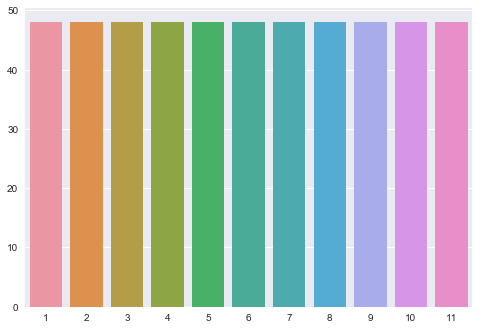

In [8]:
sns.barplot(np.unique(train["y"]),train.groupby("y").count().values[:,0])

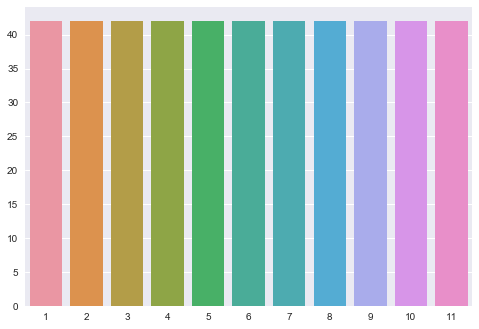

In [9]:
sns.barplot(np.unique(test["y"]),test.groupby("y").count().values[:,0])

#### Les classes sont bien équlibrées sur le train et le test

In [10]:
train.values # matrice des valeurs

array([[  1.   ,  -3.639,   0.418, ...,   0.529,  -0.874,  -0.814],
       [  2.   ,  -3.327,   0.496, ...,   0.51 ,  -0.621,  -0.488],
       [  3.   ,  -2.12 ,   0.894, ...,   0.676,  -0.809,  -0.049],
       ..., 
       [  9.   ,  -4.651,   4.246, ...,   0.094,  -1.343,   0.185],
       [ 10.   ,  -5.034,   4.993, ...,  -0.508,  -0.283,   0.304],
       [ 11.   ,  -4.261,   1.827, ...,   0.05 ,  -0.112,   0.321]])

#### On définit les matrices et les vecteurs d'entrainement et de test

In [11]:
y_train = train.values[:,0]
x_train = train.values[:,1:]
print(x_train.shape)

(528, 10)


In [12]:
y_test = test.values[:,0]
x_test = test.values[:,1:]
print(x_test.shape)

(462, 10)


# Machine Learning

#### Nous allons dans ce TP comparer plusieurs classifieurs connus en fonction de la métrique score de précision,  puis nous appliquerons la méthode de la cross-validation afin d'avoir un point de vu différent et sans doute plus précis de nos résultats. Nous distinguerons la notion de sur et sous apprentissage ainsi que leur conséquences.

<img src="https://media1.giphy.com/media/LNXivXzMwd7W0/giphy.gif" width = 300>
<a id="3"></a> 

## 1. Naive Bayes

In [13]:
NB = GaussianNB()
NB_fit = NB.fit(X=x_train,y=y_train)  # X maj obligé

In [14]:
print("le score sur le train est", ("%.3f" % accuracy_score(NB_fit.predict(x_train),y_train)))
print("le score sur le test est", ("%.3f" % accuracy_score(NB_fit.predict(x_test),y_test)))

le score sur le train est 0.720
le score sur le test est 0.461


#### Le score est plutôt correct on part de 500 données avec les 11 voyelles c'est pas mal. Naive Bayes est rapide mais pas forcement précis. On note une précision de 72% sur les données d'entrainement ce qui est normal car l'algorithme est basé sur le jeu train. La précision sur le jeu test est interressant car il permet de juger l'algorithme sur des données nouvelles, le score est 46%.

## 2. LDA

In [15]:
LDA = LinearDiscriminantAnalysis()
LDA_fit = LDA.fit(X=x_train,y=y_train)  

In [16]:
print("le score sur le train est", ("%.3f" % accuracy_score(LDA_fit.predict(x_train),y_train)))
print("le score sur le test est", ("%.3f" % accuracy_score(LDA_fit.predict(x_test),y_test)))

le score sur le train est 0.684
le score sur le test est 0.444


#### La précision sur le LDA est légerement inférieure à celle du Naive Bayes. On note une précision de 68% sur les données d'entrainement et de 44% sur le jeu test. On préfère conserver le Naive Bayes.

## 3. QDA

In [17]:
QDA = QuadraticDiscriminantAnalysis()
QDA_fit = QDA.fit(X=x_train,y=y_train) 

In [18]:
print("le score sur le train est", ("%.3f" % accuracy_score(QDA_fit.predict(x_train),y_train)))
print("le score sur le test est", ("%.3f" % accuracy_score(QDA_fit.predict(x_test),y_test)))

le score sur le train est 0.989
le score sur le test est 0.472


#### La précision sur le QDA est nettement supérieure à celle du Naive Bayes. On note une précision de 98% sur les données d'entrainement et de 47% sur le jeu test. Le QDA est le plus interressant des algorithmes.

#### Nous avons établi des comparaisons entre les précisions de prediction sur des données d'entrainement ainsi que des données test, entre les 3 classifieurs Naive Bayes, LDA et QDA. Nous pouvons conclure que le classifieur QDA est le plusprécis sur des nouvelles données à la vue des résultats 47% de précision. la précision de prédiction est un des paramètres comunément utilisé pour la comparaison de la qualité des classifieurs. Nous verrons plus tard une methode de comparaison à laquelle nous pouvons aussi nous fier.

## 4. K-NN

In [19]:
acc_train =[]
acc_test = []
for k in np.arange(1,50):
    knn= KNeighborsClassifier(n_neighbors =k)
    knn_fit= knn.fit(X=x_train,y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(x_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(x_test),y_test))

In [20]:
k_hat = np.argmax(acc_test)
print("les scores : train", ("%.3f" % acc_train[k_hat]), "/ test", ("%.3f" % acc_test[k_hat]))
print("le nombre idéal de 'voisins' pour une bonne précision du K-NN est de",k_hat+1) 

les scores : train 0.977 / test 0.608
le nombre idéal de 'voisins' pour une bonne précision du K-NN est de 6


#### K_hat est le nombre de plus proches voisins pour lequel la précision de prédiction pour le jeu test est maximale. Ici k_hat correspond à la 5ème position dans le tableau donc on retourne k_hat + 1 pour avoir la veritable valeur de k qui est 6.

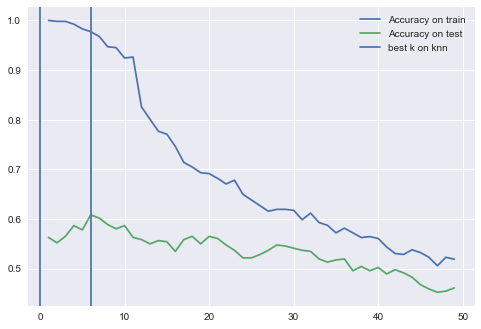

In [21]:
plt.plot(np.arange(1,50),acc_train, label= "Accuracy on train") # on sur apprend fonction trop compliquée
plt.plot(np.arange(1,50),acc_test, label= "Accuracy on test") # on sous apprend car zones de decisions 
# constantes meilleur K-NN
plt.axvline(np.arange(1,50)[k_hat], label= "best k on knn")
plt.axvline()
plt.legend()

#### Nous avons tracé les précisions sur le jeu d'entrainement et de test en fonction de la valeur k allant de 1 à 50 sur l'algorithme des plus proches voisins. Nous remarquons d'un point de vu gobal sur cet intervalle de k que les précisions diminuent lorsque le nombre de voisins considérés augmente. 
#### On note que la précision sur le jeu de données train est toujours supérieure à celle du test, mais semble converger vers celle du test lorsque k est très grand.
#### Lorsque k est très petit, on considère que l'on sur-apprend sur le jeu de données et la fonction du classifieur devient trop compliquée, tendis que si k est très grand on sous-apprend sur le jeu de données car les zones de décision deviennent constantes.

## 5. Cross-Validation sur K-NN

In [22]:
knn_cv = KNeighborsClassifier(n_neighbors=5)
score_cv_train = cross_val_score(knn_cv, x_train, y_train, cv=5)
print("les précisions des 5 cross-validations sur le jeu d'entrainement sont \n",score_cv_train)
print("La moyenne de précision sur les 5 cross-validations sur le jeu d'entrainement est de",("%.3f" % score_cv_train.mean()))

les précisions des 5 cross-validations sur le jeu d'entrainement sont 
 [ 0.59090909  0.66363636  0.72727273  0.5959596   0.50505051]
La moyenne de précision sur les 5 cross-validations sur le jeu d'entrainement est de 0.617


#### Nous retrouvons une précision similaire à celle trouvée pour le k-NN (60%) mais sans la partie l'aléa dû au choix arbitraire des données d'entrainement, ici 61% de précison.
#### Traçons la courbe des précisions en fonction de k, avec 5 cross-validations. 

1
2
3
La valeur maximale de précision sur les 50 cross-validations est de 68.525


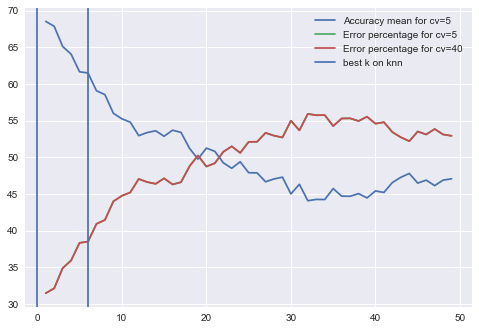

In [40]:
F=[]
G=[]
E=[]
for k in np.arange(1,50):
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    score_cv_train = cross_val_score(knn_cv, x_train, y_train, cv=5)
    score_cv_train_ = cross_val_score(knn_cv, x_train, y_train, cv=40)
    E.append(score_cv_train.mean()*100)
    F.append((1-score_cv_train.mean())*100)
    G.append((1-score_cv_train_.mean())*100)
    if score_cv_train.mean()>0.65 :
        print(k)
print("La valeur maximale de précision sur les 50 cross-validations est de",("%.3f" % max(E)))
plt.plot(np.arange(1,50),E, label= "Accuracy mean for cv=5")
plt.plot(np.arange(1,50),F,label= "Error percentage for cv=5")
plt.plot(np.arange(1,50),F,label= "Error percentage for cv=40")
plt.axvline(np.arange(1,50)[k_hat], label= "best k on knn")
plt.axvline()
plt.legend()
#print(E) # affichage du tableau contenat les 50 moyennes des précisions

#### Nous choisissons la valeur k=5 pour effectuer la cross-validation sur la méthode des plus proches voisins car nous avons vu précédement que c'était la valeur optimale pour le K-NN, les valeurs pour k en dessous de 5 sont faussées car il y a sur-apprentissage et pour les valeurs trop grandes (aux alentour de 50) il y a sous-apprentissage.
#### On remarque bien que la précision moyenne suite à la cross-validation sur les données train et test diminuent lorsque l'on augmente le k aux alentours d'une valeur de 20 par exemple, car la précision diminue pour k>5.
#### Nous effectuons donc la cross-validation en divisant notre ensemble de données en 5 groupes. Nous établissons donc 5 jeux de données train différents puis les 5 précisions de prédictions sur les données train nous sont données suite à l'apprentissage par l'algorithme K-NN. Nous en calculons une moyenne qui est de 61%, ce qui est inférieur aux 97% détéctés sans cross-validation, on peut d'avantage s'y fier car la cross-validation apporte une plus grande validité des calculs étant donné les 5 différents points de vus étudiés.
#### Nous reproduisons le même schéma sur pour k allant de 1 à 50. Nous pouvons aussi tracer la courbe des pourcentages  d'erreurs en fonction des k lors des cross-validations.

#### Symétriquement, le pourcentage d'erreur augmente en fonction du choix du nombre de plus proches voisins et ce quelque soit le nombre de cross-validation.

## 6. Adaptation de cette méthode aux algorithmes Naive Bayes, LDA et QDA 
### a. Naive Bayes

In [25]:
NB_cv = GaussianNB()
score_cv_train = cross_val_score(NB_cv, x_train, y_train, cv=5)
print("les précisions des 5 cross-validations sont \n",score_cv_train)
print("La moyenne de précision des 5 cross-validations sur le Naive Bayes est de",("%.3f" % score_cv_train.mean()))

les précisions des 5 cross-validations sont 
 [ 0.53636364  0.66363636  0.52727273  0.60606061  0.27272727]
La moyenne de précision des 5 cross-validations sur le Naive Bayes est de 0.521


### b. LDA

In [26]:
LDA_cv = LinearDiscriminantAnalysis()
score_cv_train = cross_val_score(LDA_cv, x_train, y_train, cv=5)
print("les précisions des 5 cross-validations sont \n",score_cv_train)
print("La moyenne de précision des 5 cross-validations sur la LDA est de",("%.3f" % score_cv_train.mean()))

les précisions des 5 cross-validations sont 
 [ 0.52727273  0.35454545  0.59090909  0.63636364  0.2020202 ]
La moyenne de précision des 5 cross-validations sur la LDA est de 0.462


### c. QDA

In [27]:
QDA_cv = QuadraticDiscriminantAnalysis()
score_cv_train = cross_val_score(QDA_cv, x_train, y_train, cv=5)
print("les précisions des 5 cross-validations sont \n",score_cv_train)
print("La moyenne de précision des 5 cross-validations sur le QDA est de",("%.3f" % score_cv_train.mean()))

les précisions des 5 cross-validations sont 
 [ 0.52727273  0.52727273  0.64545455  0.62626263  0.36363636]
La moyenne de précision des 5 cross-validations sur le QDA est de 0.538


## Concusion

#### Nous remarquons que la méthode cross-validation permet d'obtenir une plus grande fiabilité sur nos résultats car cette dernière étudie plusieurs points de vus. De plus, on remarque que les précisions de prédiction restent supérieures à celles des classifieurs sans cross validation ce qui veut dire que notre algorithme est capable avec une plus grande abilité, de s'adapter à de nouvelles données et proposer une réponse qui suit avec une plus ou moins grande précision la loi décrite par nos données d'apprentissage.
#### On peut aussi affirmer suite aux observations que le K-NN reste, suite à la cross-validation, de modèle de référence avec comme paramètre 6 voisins les plus proches car sa précision de prédiction est de 61% sur des données test, suivi de près par le QDA (53%) et par le Naive Bayes (52%). Enfin le LDA reste quand même legèrement moins performant avec un score de 46% d'accuracy.

## Arbres de décision

In [28]:
arbre = DecisionTreeClassifier()
arbre_fit = arbre.fit(X=x_train,y=y_train)
print("La précision de prédiction sur le jeu d'entrainement est ", ("%.3f" %accuracy_score(arbre_fit.predict(x_train), y_train)))
print("La précision sur le sur le jeu test est " , ("%.3f" %accuracy_score(arbre_fit.predict(x_test), y_test)))

La précision de prédiction sur le jeu d'entrainement est  1.000
La précision sur le sur le jeu test est  0.442


In [29]:
arbre_cv = DecisionTreeClassifier()
score_cv_train = cross_val_score(arbre_cv, x_train, y_train, cv=5)
print("les précisions des 5 cross-validations sont \n",score_cv_train)
print("La moyenne de précision des 5 cross-validations sur le classifieur arbre est de",("%.3f" % score_cv_train.mean()))

les précisions des 5 cross-validations sont 
 [ 0.49090909  0.66363636  0.45454545  0.50505051  0.35353535]
La moyenne de précision des 5 cross-validations sur le classifieur arbre est de 0.494


#### On remarque une précision plus faible lorsque l'on propose des nouvelles données au classifeur arbre comparé aux algorithmes prédédents. L'algorithme semble avoir sur-appris les données train étant donnée une précision élevée 100% sur le train contre 42% sur le test et 49% en moyenne suite à la cross-validation.

In [30]:
with open("knn_tree.dot", 'w') as f:
    f = tree.export_graphviz(knn_tree, out_file=f)

NameError: name 'knn_tree' is not defined

In [ ]:
dot -Tpdf knn_tree.dot -o knn_tree.pdf

In [ ]:
import pydotplus
dot_data = tree.export_graphviz(knn_tree, out_file=None,
            feature_names=x_train_names,
            class_names=y_train_names,
            filled=True, rounded=True,
            special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("knn_tree.pdf")